# <centeR> Lesson 7 and HW6 <br><br> Limit Theorems + Distribution of the sample mean </centeR>

---

Note: This notebook is **ungraded** and will not be part of your final grade, but there are a few questions marked with the **<font color = "darkgreen">IMPORTANT</font>** token. Make sure you understand their answers thoroughly, because they are new material. The other questions are also important, but I consider them review. I'll circulate solutions to important questions after class.

Everything here is testable in the midterm. Have fun!

---

#### From last class

Suppose $X_i$ are random variables for $X_1, X_2, \cdots, X_n$. For example, maybe each $X_i$ is the roll of a die.

+ If $Z = X_1$, then $Z$ is a random variable. The distribution is the same as $X_1$.

+ If $Z = X_1 + X_2$ then $Z$ is a random variable. The distribution is *not* the same as $X_1$ or $X_2$.

+ If $Z = X_1 + X_2 + \cdots + X_n$  then $Z$ is a random variable. The distribution is *not* the same as any of the $X_i$'s.

+ If $Z = \frac{1}{n}(X_1 + X_2 + \cdots + X_n)$  then $Z$ is still a random variable. The distribution is *not* the same as any of the $X_i$'s.


#### In this homework

The question you're suppose to answer in this Lesson + HW combo is: **what is the distribution of $Z = \frac{1}{n}\sum_i X_i$?**

<hr>

## <center> Distribution of the sample mean

### 1) Sample mean of a Normally-distributed rv

Do the following 1000 times. The number 1000 here is the **number of simulations**.

+ Draw 10 numbers from the $Normal(2, 4)$ distribution. The number 10 here is the **sample size**.
+ Compute the mean of the numbers you drew.

In the end, you should have 1000 sample means, one for each simulation.

In [3]:
from scipy.stats import norm # Note norm uses the mean and *standard deviation*, not variance!
from numpy import sqrt, mean
X = norm(2, sqrt(4)).rvs((1000, 10))  # Creates a 1000-by-10 matrix of draws from Z
Z = mean(X, axis = 1)  # Takes the mean of each row

Now, plot a normalized histogram of the sample means.

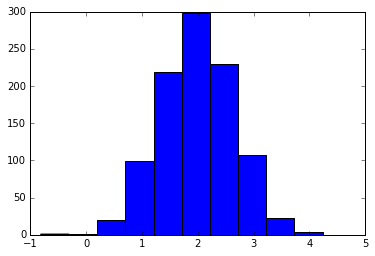

In [109]:
from matplotlib.pyplot import hist
%matplotlib inline
hist(Z);

Discuss:
 
+ What kind of process are we simulating here?
 
+ What does the distribution of the sample mean look like? 

+ Where is the mean of the distribution of your sample means?

+ Instead of a **sample size** of 10, what if the **sample size** were 100? How about 20000? How about $\infty$?

+ What's the intuition behind these changes?

+ ** How does this relate to the Law of Large Numbers?**

---

### 2) Sample mean of a Exponentially-distributed rv

Redo the exercise above, but instead of $Normal$, draw from the $Exponential(\lambda = 5)$.

Do the following 1000 times:

+ Sample 10 numbers from the $Exponential(\lambda = 5)$ (recall in Python that means `scale = 1/5`)

+ Compute their sample mean

Then plot a histogram of all sample means.

In [4]:
from scipy.stats import expon
X = expon(scale = 1/5).rvs((1000, 100))  # Creates a 1000-by-10 matrix of draws from Z
Z = mean(X, axis = 1) # Takes the mean of each row

In [5]:
hist(Z, bins = 100);

Discuss:

+ What does the distribution look like when the number of draws per sample increases?

+ What is the mean of that distribution?

+ How does the variance change as the number of draws per sample increases?

+ **How does this related to the Central Limit Theorem?**

---

### Sample mean of a ???-distributed rv

Last one! 

Same thing, but now instead of computing the mean of a random variable $X \sim Exponential(5)$, let's compute the approximate probability of $P(X < \frac{1}{8})$.

I've done most of the work for you. Your job is to interpret what I'm doing.

In [139]:
from scipy.stats import expon
n_simulations = 5000
sample_size = 100
true_prob = expon(scale = 1/5).cdf(1/8)                  # 1
X = expon(scale = 1/5).rvs((n_simulations, sample_size)) # 2
Y = X < 1/8                                              # 3
Z = mean(Z, axis = 1)                                    # 4

What's going on at each line?

+ #1: We're computing the true probability that $P(X < \frac{1}{8})$
+ #2: Create an array (i.e., a table) of 5000 x 100 draws from the $Exponential(5)$ distribution
+ #3: <font color = "red">Now $Y$ is distributed as **Bernoulli(p)**, where the probability of success $p = P(X < \frac{1}{8})$</font>
+ #4: You should understand that $Z$ has the following properties:
    + It is the sample mean of $Y$
    + It converges to the true mean of $Y$, which is $E[Y] = 1\cdot p + 0\cdot (1- p) = p = P(X < \frac{1}{8})$
    + Therefore, $Z \rightarrow^p P(X < \frac{1}{8})$.

Discuss before uncommenting the next cell:

+ What will this histogram look like?

+ What will be the center of mass of the histogram?

+ What would happen if you increased the `sample_size`?

In [148]:
hist(Z, bins = 100);

Discuss before uncommenting the next cell:

+ If I told you that the $P(X < 1/8) = 0.45$, would you believe me?
+ If I told you that the $P(X < 1/8) = 0.1$, would you believe me?
+ If I told you that the $P(X < 1/8) = 0.9$, would you believe me?

...Why not?

In [6]:
print(true_prob)

NameError: name 'true_prob' is not defined

---

### Recap:

+ Law of Large Numbers (LLN): the fact that the sample mean converges in probability to the theoretical mean

+ Central limit theorem: the fact that the sample means have a normal distribution*, regardless of the distribution you started with, so long as the distribution.


(Actually the CLT talks about <i>sums</i>, not averages. However averages are just sums scaled by $\frac{1}{n}$, so the argument still follows. We'll make an important distinction precise after the midterm)

---

### Properties of the mean

*Hint for Q1-Q3* In HW5 you proved that if $Z \sim binomial(n,p)$, then $E[Z] = np$. This formula **does not** work for any other distribution, but your solution should look similar to HW5Q1 nevertheless.

**Q1)** Prove that if $Z = X_1 + \cdots + X_n$, and each $X_i \sim Exponential(\lambda)$, then $E[Z] = \frac{n}{\lambda}$

**Q2)** Prove that if $Z = X_1 + \cdots + X_n$, and each $X_i \sim Geometric(p)$, then $E[Z] = \frac{n}{p}$

**Q3)** Prove that if $Z = X_1 + \cdots + X_n$, and each $X_i \sim Gamma(\alpha, \beta)$, then $E[Z] = n\frac{\alpha}{\beta}$

**Q4)** [*Centering*] Suppose $Z = X - c$ for some number $c$, with $X \sim Normal(3, 4)$. If you know $E[Z] = 0$, then what is $c$?

**Q5) <font color = "darkgreen">IMPORTANT</font>**  [Mean of sample mean] If $Z = \frac{1}{n}\sum_i X_i$, what is $E[Z]$ in terms of $E[X_1]$?

<b>Solution</b>

$E[Z] = E[\frac{1}{n}\sum_i X_i]$ by definition of $Z$<br>
$\qquad =\frac{1}{n} E[\sum_i X_i]$  by linearity of expectation<br>
$\qquad =\frac{1}{n} \sum_i E[X_i]$  by linearity of expectation again<br>
$\qquad =\frac{1}{n} \sum_i E[X_1]$  since all the $X_i$'s have the same mean<br>
$\qquad =\frac{1}{n} n E[X_1]$  since we summed up the number $E[X_1]$ $n$ times<br>
$\qquad = E[X_1]$  since we summed up the number $E[X_1]$ $n$ times<br>

Therefore, $E[Z] = E[X_1]$ 
<br>

---

### Properties of the variance

You're now well-versed in the *linearity* property of expectations, that allows you to say:
<br><br>
<center>If $Z = aX + bY$, then $E[Z] = aE[X] + bE[Y] + c$</center>

Unfortunately, this doesn't work if $Z$ suffers any other transformation. Q6-Q9 will help you see this. Then, in Q9,

**Q6)** Suppose that $X \sim Binomial(3, \frac{1}{2})$, and $g(x) = x^2$. 

+ a) What is $E[g(X)]$? 

+ b) What $g(E[X])$?

**Q7)** Suppose that $X \sim DiscreteUniform(1,6)$ (i.e., a die roll), and $g(x) = \sqrt{x}$.

+ a) What is $E[g(X)]$? 

+ b) What $g(E[X])$?

**Q9)** In general, is it true that $E[g(X)] = g(E[X])$? Bonus: for what kind of functions is this true? (Hint: HW5Q1a)

**Q10)** Prove that for any random variable $X$ with finite second moments, the following is true:

<center>$E[(X - c)^2] = E[X^2] - 2cE[X] + c^2$</center>

Then use this to prove this alternative formula for the variance:
<br><br>
<center>$Var(X) = E[X^2] - E[X]^2$</center>

**Q11) <font color = "darkgreen"></font>** [*Standardizing*] Prove that

<center>$Var[aX + b] = a^2Var(X)$. </center>

Then answer:

<center>If $Var(X) = \sigma^2$ and $Var(aX) = 1$, what is $a$? (The inverse of...?)</center>

<b>Solution</b>

$Var[aX - b] = E[(aX - b - E[aX - b])^2]$ by definition of variance<br>
$\qquad \qquad \ \ = E[(aX - b - aE[X] - E[b])^2]$  by linearity of expectation<br>
$\qquad \qquad \ \ = E[a^2(X - E[X])^2]$  Since the $b$'s cancel out, then collecting $a$<br>
$\qquad \qquad \ \ = a^2E[(X - EX)^2]$ By linearity of expectation<br>
$\qquad \qquad \ \ = a^2Var(X)$ By definition of variance

<br>
Therefore
$a$ is $\frac{1}{\sigma}$, i.e., the inverse of the standard deviation, since:

$$Var[\frac{1}{\sigma}X] = \frac{1}{\sigma^2}Var[X] = \frac{1}{\sigma^2}\sigma^2 = 1$$

**Q12) <font color = "darkgreen">IMPORTANT</font>** Let's see one last property of the variance before going back to the discussion about the CLT. 

In general, it is **not** true that if $Z = X + Y$, then $Var(Z) = Var(X) + Var(Y)$. However, this is true when the variables are *independent*. We'll get back to why later, but for now here's a neat way to commit this to memory. 

I hope you remember that the symbol for independence was "$\perp$", and that was the same as the symbol for "perpendicular". I hope you also remember Pythagoras' theorem, that says that if two sides of a triangle are *perpendicular* ($\perp$!!!) then their lengths follow this rule:

<img src="pythagoras.png" width = 200>

Well, the variances work similarly: they also do some *squaring*, and if $X$ and $Y$ are *independent* ($\perp$!!!), then their variances follow a simple rule. 

<img src="vars.png" width = 200>

...and it turns out that the formula for the case where triangles' sides are not perpendicular is also similar to the formula for the sum of variances in the dependent case, as we'll see later. Coincidence? Definitely not, but a discussion of the reason for this falls outside the scope of our course.

Anyway, use the formula above to say and your answer to `Q11` to answer:

<center>If $Z = \frac{1}{n}\sum_i X_i$, then what is $Var(Z)$ in terms of $Var(X_1)$?


$Var(Z) = Var(\frac{1}{n}\sum_i X_i) \qquad $ by definition of $Z$ 

$\qquad \ \ =  \frac{1}{n^2 }Var(\sum_i X_i) \qquad $ using the formula in `Q11`, where $a = \frac{1}{n}$.

$\qquad \ \ =  \frac{1}{n^2 }\sum_i Var(X_i) \qquad $ since each $X_i$ is independent of the next

$\qquad \ \ =  \frac{1}{n^2 }\sum_i Var(X_1) \qquad $ since $Var(X_i) = Var(X_1)$ for any $i$

$\qquad \ \ =  \frac{1}{n^2 }n Var(X_1) \qquad $ the last row was just summing $Var(X_1)$ n times

$\qquad \ \ =  \frac{1}{n}Var(X_1) \qquad $ simplifying the fractions

---

**Q13) <font color = "darkgreen">IMPORTANT</font>** Your answers to `Q5` and `Q12` are the *mean and variance of the sample mean*. Put them together with what you learned about the Central Limit Theorem to complete this sentence:

> If $X_i$ are independent draws from a distribution with mean $E[X_i] = \mu$ and finite variance $Var(X_i) = \sigma^2$, then the sample mean $Z = \frac{1}{n}\sum_i X_i$ converges in distribution to a(n) \____(a)\____-distributed random variable with mean \____(b)\____ and variance \____(c)\____.

(a) must be *Normally* distributed, by the CLT

(b) By the argument in `Q4`, $E[Z] = E[X_1] = \mu$

(c) By the argument in `Q12`, $Var[Z] = \frac{1}{n}Var[X_1] = \frac{\sigma^2}{n}$

Therefore, for large $n$, $Z$'s *approximate* distribution is (denoted by $\sim^a$):

$$Z \sim^a Normal(\mu, \frac{\sigma^2}{n})$$

<hr>

####  Note

"But wait!" - the careful student asks - "Look at the formula above. As $n \rightarrow \infty$, the variance decreases to zero, so doesn't the randomness just disappear? Moreover, the Law of Large Numbers says that the sample mean collapses to the theoretical mean $\mu$, which is a *constant*. So which one is it: is $Z$ a constant, or is $Z$ a normally-distributed variable?!"  

Those are very good observations. The answer is both: as $n$ tends to $\infty$, $Z$ will indeed collapse to $\mu$. However, for large but finite $n$, it is Normally-distributed. As long as we're not *really* at infinity -- i.e., as long as we're talking about the real world, where our data is finite -- the sample mean is still random and thus has a distribution.